In [1]:
### Function Imports
from CorrFunctions import import_fx_data, plot_forex, corr_matrix, stacked_correlations, daily_rets_most_corr, compute_hedge_ratio, calculate_hedged_unhedged, plot_hedged_returns, performance_metrics


In [2]:
### Load in FX Rate Data
all_forex_pairs = [
    'EURUSD=X', 'GBPUSD=X', 'USDJPY=X', 'USDCHF=X', 'AUDUSD=X', 'NZDUSD=X',
    'USDCAD=X', 'EURGBP=X', 'EURJPY=X', 'EURCHF=X', 'EURAUD=X', 'EURNZD=X',
    'EURCAD=X', 'GBPAUD=X', 'GBPJPY=X', 'GBPCHF=X', 'AUDJPY=X', 'AUDCHF=X',
    'AUDNZD=X', 'NZDJPY=X', 'NZDCHF=X', 'CADJPY=X', 'CADCHF=X', 'CHFJPY=X'
]
forex_pairs = ['EURJPY=X', 'GBPJPY=X']
start_date = '2023-07-01'
end_date = '2024-07-01'
forex_data = import_fx_data(forex_pairs, start_date, end_date)
forex_data.tail()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Date,EURJPY=X,GBPJPY=X
255,2024-06-24,170.850006,202.018997
256,2024-06-25,171.375000,202.513000
257,2024-06-26,171.009995,202.539993
258,2024-06-27,171.535004,202.716003
259,2024-06-28,172.065002,203.188995


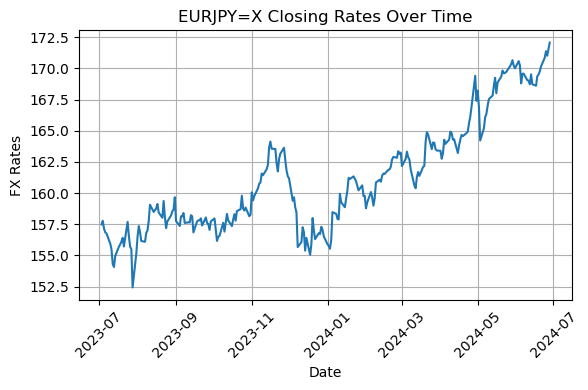

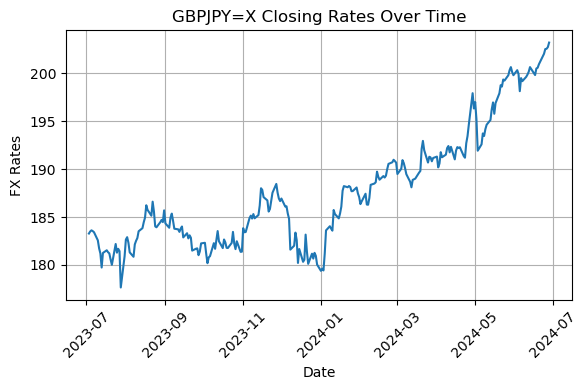

In [3]:
### Plot FX Rate Data
plot_forex(forex_data, forex_pairs)

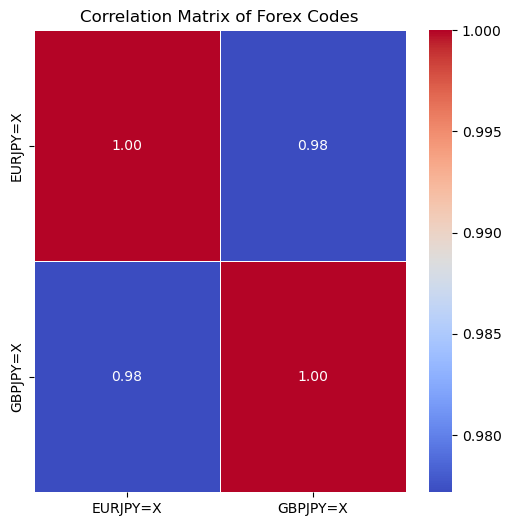

In [4]:
### Correlation Matrix Heatmap
corr_matrix(forex_data)

In [5]:
### Return Stacked Correlation -> Chose the forex pairs that are the most correlated (top of the list)
stacked_corr = stacked_correlations(forex_data)
print(stacked_corr.head(5))

EURJPY=X  GBPJPY=X    0.977174
GBPJPY=X  EURJPY=X    0.977174
Date      GBPJPY=X    0.867985
GBPJPY=X  Date        0.867985
Date      EURJPY=X    0.865814
dtype: float64


In [6]:
### Compute daily returns of Most Correlated Pairs
most_corr_pairs, returns = daily_rets_most_corr(forex_data)
print("Most correlated pairs:", most_corr_pairs)
returns.tail()


Most correlated pairs: ['EURJPY=X', 'GBPJPY=X']


,Date,EURJPY=X,GBPJPY=X
254,2024-06-24,0.004108,0.004041
255,2024-06-25,0.003073,0.002445
256,2024-06-26,-0.002130,0.000133
257,2024-06-27,0.003070,0.000869
258,2024-06-28,0.003090,0.002333


In [7]:
### Compute VAR
# Calculate the 95% Value at Risk (VaR) for each currency pair
# Ex. When EURUSD=X: -0.008645, that means with 95% confidence, the most that the EURUSD rate is expected to 
# lose in one day is approximately 0.8645% of its value.
VaR = returns.quantile(0.05)
print("Value at Risk (95% Confidence level):\n", VaR)

Value at Risk (95% Confidence level):
 Date        2023-07-20 21:36:00
EURJPY=X              -0.007635
GBPJPY=X              -0.007155
Name: 0.05, dtype: object


In [8]:
### Call Hedge Ratio Function
hedge_ratio = compute_hedge_ratio(most_corr_pairs, returns)
print("Hedge Ratio:", round(hedge_ratio, 4))


Hedge Ratio: 0.9148


In [9]:
### Backtesting -> Function Call to return Hedged and Unhedged Cumulative Returns
# Set value of Long Position
long_pos = 1000  
short_pos, hedged_cumulative_rets, unhedged_cumulative_rets = calculate_hedged_unhedged(long_pos, most_corr_pairs, returns, hedge_ratio)
print("Long Position Size: ", long_pos)
print("Short Position Size: ", round(short_pos, 4))
print("Recent Hedged Cumulative Returns: ", hedged_cumulative_rets.tail(5))
print("Recent Unhedged Cumulative Returns: ", unhedged_cumulative_rets.tail(5))


Long Position Size:  1000
Short Position Size:  -914.778
Recent Hedged Cumulative Returns:  254    991.923609
255    992.752758
256    990.517283
257    992.770803
258    993.719211
dtype: float64
Recent Unhedged Cumulative Returns:  254    1084.817015
255    1088.150479
256    1085.832866
257    1089.166427
258    1092.531669
Name: EURJPY=X, dtype: float64


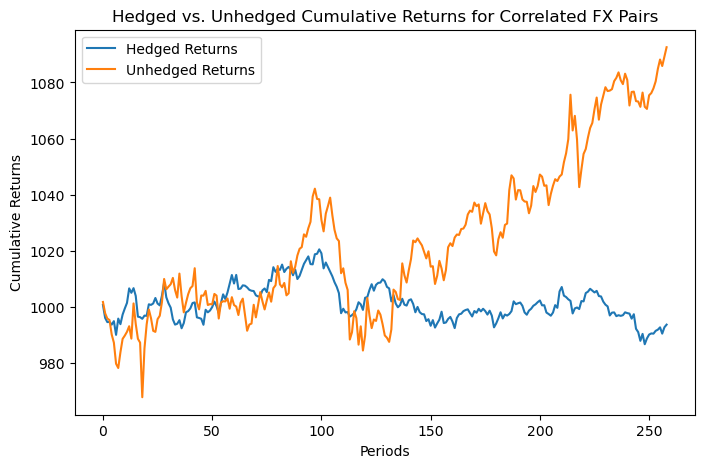

In [10]:
### Plot Hedged vs. Unhedged Returns
plot_hedged_returns(hedged_cumulative_rets, unhedged_cumulative_rets)


In [11]:
### Performance Metrics Function Return
performance_metrics(long_pos, hedged_cumulative_rets, unhedged_cumulative_rets, returns)

Metric                                  Hedged        Unhedged
Total Returns                          -6.2808         92.5317
Annualized Returns                         nan         81.7350
Mean Return                          1001.3410       1023.8302
Standard Deviation                      6.5379         28.5993
Sharpe Ratio                         2431.3128        568.2928

The Sharpe ratio measures the risk-adjusted return of an investment.
In this instance, the hedged strategy has a Sharpe ratio of 2431.3128,
which means for every unit of risk, the hedged portfolio is generating 2431.3128 units of return above the risk-free rate.
The unhedged strategy has a Sharpe ratio of 568.2928,
indicating that for every unit of risk, the unhedged portfolio is generating 568.2928 units of return above the risk-free rate.
A higher Sharpe ratio typically indicates a more favorable risk-adjusted return.
